### Module Import

In [1]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image

### 1. Edge Detection

#### Load Image

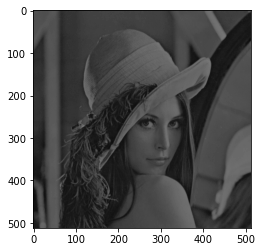

In [2]:
file = "./lena_raw_512x512.raw"
fileID = open(file, "rb")
Img_lena = np.fromfile(fileID, dtype = 'uint8', sep = "")
Img_lena = np.reshape(Img_lena, [512, 512])
plt.imshow(Img_lena, cmap='gray', vmin=0, vmax=500)

#### Roberts

In [3]:
def getRoberts(img, threshold):
    G_x = np.array([[1, 0],
                    [0, -1]])
    G_y = np.array([[0, -1], 
                    [1, 0]])
    
    row, col = img.shape

    edge_img = []

    for i in range(row):
        for j in range(col):
            try:
                x = 0
                y = 0
                for r in range(G_x.shape[0]):
                    for c in range(G_x.shape[1]):
                        x = x + img[i + r, j + c]*G_x[r, c]
                        y = y + img[i + r, j + c]*G_y[r, c]
            except:
                x = 0
                y = 0
            magnitude = math.sqrt(pow(x, 2) + pow(y, 2))

            if(magnitude < threshold):
                edge_img.append(0)
            else:
                edge_img.append(255)
    edge_img = np.array(edge_img, dtype="uint8")
    edge_img = np.reshape(edge_img, [512, 512])
    return edge_img

#### Sobel

In [4]:
def getSobel(img, threshold):
    G_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
    G_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])
    
    row, col = img.shape

    edge_img = []

    for i in range(row):
        for j in range(col):
            try:
                x = 0
                y = 0
                for r in range(G_x.shape[0]):
                    for c in range(G_x.shape[1]):
                        x = x + img[i + r, j + c]*G_x[r, c]/4
                        y = y + img[i + r, j + c]*G_y[r, c]/4
            except:
                x = 0
                y = 0
            magnitude = math.sqrt(pow(x, 2) + pow(y, 2))

            if(magnitude < threshold):
                edge_img.append(0)
            else:
                edge_img.append(255)
    edge_img = np.array(edge_img, dtype="uint8")
    edge_img = np.reshape(edge_img, [512, 512])
    return edge_img

#### Prewit

In [5]:
def getPrewit(img, threshold):
    G_x = np.array([[-1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, 1]])
    G_y = np.array([[1, 1, 1],
                    [0, 0, 0],
                    [-1, -1, -1]])
    
    row, col = img.shape

    edge_img = []

    for i in range(row):
        for j in range(col):
            try:
                x = 0
                y = 0
                for r in range(G_x.shape[0]):
                    for c in range(G_x.shape[1]):
                        x = x + img[i + r, j + c]*G_x[r, c]/3
                        y = y + img[i + r, j + c]*G_y[r, c]/3
            except:
                x = 0
                y = 0
            magnitude = math.sqrt(pow(x, 2) + pow(y, 2))

            if(magnitude < threshold):
                edge_img.append(0)
            else:
                edge_img.append(255)
    edge_img = np.array(edge_img, dtype="uint8")
    edge_img = np.reshape(edge_img, [512, 512])
    return edge_img

#### 5x5 Stochastic Gradient

In [6]:
def getStochastic(img, threshold):
    G_x = np.array([[0.267, 0.364, 0, -0.364, -0.267],
                    [0.373, 0.562, 0, -0.562, -0.373],
                    [0.463, 1.000, 0, -1.000, -0.463],
                    [0.373, 0.562, 0, -0.562, -0.373],
                    [0.267, 0.364, 0, -0.364, -0.267]])
    G_y = G_x.T
    
    row, col = img.shape

    edge_img = []

    for i in range(row):
        for j in range(col):
            try:
                x = 0
                y = 0
                for r in range(G_x.shape[0]):
                    for c in range(G_x.shape[1]):
                        x = x + img[i + r, j + c]*G_x[r, c]
                        y = y + img[i + r, j + c]*G_y[r, c]
            except:
                x = 0
                y = 0
            magnitude = math.sqrt(pow(x, 2) + pow(y, 2))

            if(magnitude < threshold):
                edge_img.append(0)
            else:
                edge_img.append(255)
    edge_img = np.array(edge_img, dtype="uint8")
    edge_img = np.reshape(edge_img, [512, 512])
    return edge_img

#### Results_Original Image

In [7]:
threshold = 64

robert_img = getRoberts(Img_lena, threshold)
sobel_img = getSobel(Img_lena, threshold)
prewit_img = getPrewit(Img_lena, threshold)
stochastic_img = getStochastic(Img_lena, threshold)

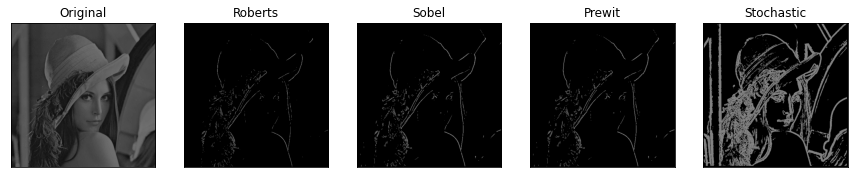

In [8]:
fig = plt.figure(figsize = (15,15))

plt.subplot(1,5,1)
plt.imshow(Img_lena, cmap='gray', vmin=0, vmax=500)
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(1,5,2)
plt.imshow(robert_img, cmap='gray', vmin=0, vmax=500)
plt.title('Roberts')
plt.xticks([])
plt.yticks([])

plt.subplot(1,5,3)
plt.imshow(sobel_img, cmap='gray', vmin=0, vmax=500)
plt.title('Sobel')
plt.xticks([])
plt.yticks([])

plt.subplot(1,5,4)
plt.imshow(prewit_img, cmap='gray', vmin=0, vmax=500)
plt.title('Prewit')
plt.xticks([])
plt.yticks([])

plt.subplot(1,5,5)
plt.imshow(stochastic_img, cmap='gray', vmin=0, vmax=500)
plt.title('Stochastic')
plt.xticks([])
plt.yticks([])

plt.show()

##### Save Result_Original

In [9]:
save_Robert = Image.fromarray(robert_img)
save_Sobel = Image.fromarray(sobel_img)
save_Prewit = Image.fromarray(prewit_img)
save_Stochastic = Image.fromarray(stochastic_img)

dir_path = "./Result"
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

save_Robert.save("./Result/Robert.bmp", 'BMP')
save_Sobel.save("./Result/Sobel.bmp", 'BMP')
save_Prewit.save("./Result/Prewit.bmp", 'BMP')
save_Stochastic.save("./Result/Stochastic.bmp", 'BMP')

#### Results_Noisy Image
> C 코드를 Python으로 직접 변환할 자신이 없어 인터넷에서 참조   
> https://marisara.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-openCV-10-%EA%B0%80%EC%9A%B0%EC%8B%9C%EC%95%88-%EB%85%B8%EC%9D%B4%EC%A6%88Gaussian-Noise

In [4]:
def makeNoise(img, std):
    row, col = img.shape
    img_noise = np.zeros((row, col), dtype='uint8')

    for i in range(row):
        for j in range(col):
            make_noise = np.random.normal()
            set_noise = std * make_noise
            img_noise[i, j] = img[i, j] + set_noise
    return img_noise

([], [])

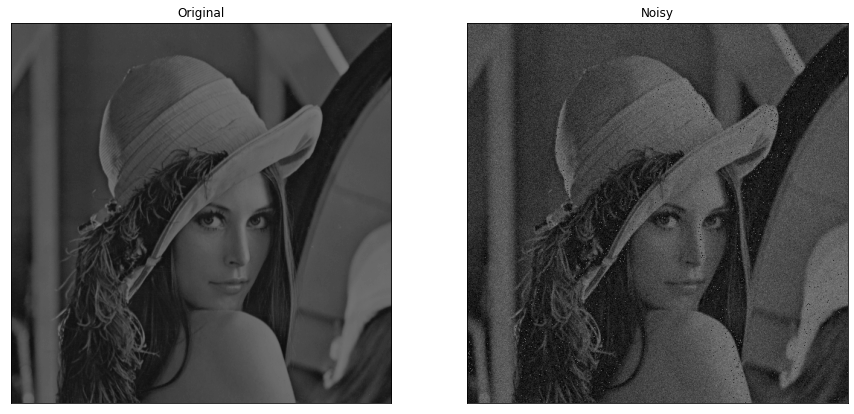

In [11]:
std = 20
Img_lena_noisy = makeNoise(Img_lena, std)
fig = plt.figure(figsize = (15,15))

plt.subplot(1,2,1)
plt.imshow(Img_lena, cmap='gray', vmin=0, vmax=500)
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(Img_lena_noisy, cmap='gray', vmin=0, vmax=500)
plt.title('Noisy')
plt.xticks([])
plt.yticks([])

In [12]:
threshold = 64

robert_img_noisy = getRoberts(Img_lena_noisy, threshold)
sobel_img_noisy = getSobel(Img_lena_noisy, threshold)
prewit_img_noisy = getPrewit(Img_lena_noisy, threshold)
stochastic_img_noisy = getStochastic(Img_lena_noisy, threshold)

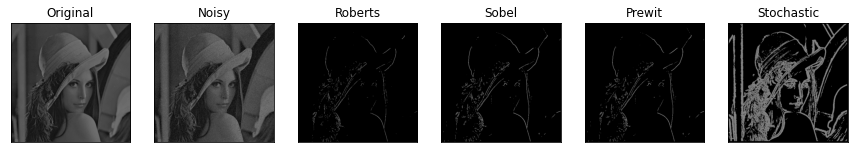

In [13]:
fig = plt.figure(figsize = (15,15))

plt.subplot(1,6,1)
plt.imshow(Img_lena, cmap='gray', vmin=0, vmax=500)
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(1,6,2)
plt.imshow(Img_lena_noisy, cmap='gray', vmin=0, vmax=500)
plt.title('Noisy')
plt.xticks([])
plt.yticks([])

plt.subplot(1,6,3)
plt.imshow(robert_img, cmap='gray', vmin=0, vmax=500)
plt.title('Roberts')
plt.xticks([])
plt.yticks([])

plt.subplot(1,6,4)
plt.imshow(sobel_img, cmap='gray', vmin=0, vmax=500)
plt.title('Sobel')
plt.xticks([])
plt.yticks([])

plt.subplot(1,6,5)
plt.imshow(prewit_img, cmap='gray', vmin=0, vmax=500)
plt.title('Prewit')
plt.xticks([])
plt.yticks([])

plt.subplot(1,6,6)
plt.imshow(stochastic_img, cmap='gray', vmin=0, vmax=500)
plt.title('Stochastic')
plt.xticks([])
plt.yticks([])

plt.show()

##### Save Result_Noisy Image

In [14]:
save_Img_lena_noisy = Image.fromarray(Img_lena_noisy)
save_Robert_noisy = Image.fromarray(robert_img_noisy)
save_Sobel_noisy = Image.fromarray(sobel_img_noisy)
save_Prewit_noisy = Image.fromarray(prewit_img_noisy)
save_Stochastic_noisy = Image.fromarray(stochastic_img_noisy)

dir_path = "./Result"
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

save_Img_lena_noisy.save("./Result/Original_noisy.bmp", 'BMP')
save_Robert_noisy.save("./Result/Robert_noisy.bmp", 'BMP')
save_Sobel_noisy.save("./Result/Sobel_noisy.bmp", 'BMP')
save_Prewit_noisy.save("./Result/Prewit_noisy.bmp", 'BMP')
save_Stochastic_noisy.save("./Result/Stochastic_noisy.bmp", 'BMP')


#### Error Rate

In [37]:
def countError(edge_img, edge_img_cmp):
    n0 = np.count_nonzero(edge_img)
    n1 = abs(n0 - np.count_nonzero(edge_img_cmp))

    return n1/n0

In [48]:
error_rate_Robert = countError(robert_img, robert_img_noisy)
error_rate_Sobel = countError(sobel_img, sobel_img_noisy)
error_rate_Prewit = countError(prewit_img, prewit_img_noisy)
error_rate_Stochastic = countError(stochastic_img, stochastic_img_noisy)

print("*===== Error Rate =====*")
print(" #1. Robert     : {:.3f}".format(error_rate_Robert))
print(" #2. Sobel      : {:.3f}".format(error_rate_Sobel))
print(" #3. Prewit     : {:.3f}".format(error_rate_Prewit))
print(" #4. Stochastic : {:.3f}".format(error_rate_Stochastic))

*===== Error Rate =====*
 #1. Robert     : 6.703
 #2. Sobel      : 1.133
 #3. Prewit     : 1.067
 #4. Stochastic : 1.092


### 2. Low-pass & Median Filters

#### Load & Make Noise Image

In [2]:
file = "./BOAT512.raw"
fileID = open(file, "rb")
Img_boat = np.fromfile(fileID, dtype = 'uint8', sep = "")
Img_boat = np.reshape(Img_boat, [512, 512])

([], [])

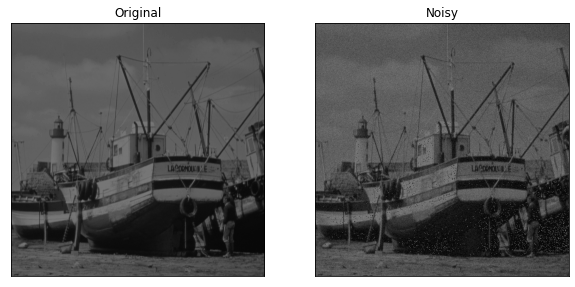

In [32]:
std = 15
Img_boat_noisy = makeNoise(Img_boat, std)
fig = plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
plt.imshow(Img_boat, cmap='gray', vmin=0, vmax=500)
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(Img_boat_noisy, cmap='gray', vmin=0, vmax=500)
plt.title('Noisy')
plt.xticks([])
plt.yticks([])

#### Low-pass Filter

In [18]:
def lowPassFiltering(img):
    row, col = img.shape
    img_filtered = []
    for i in range(row):
        for j in range(col):
            filter = img[i:i+3, j:j+3].flatten().tolist()
            img_filtered.append(min(filter))

    img_filtered = np.reshape(img_filtered, [512, 512])
    return img_filtered

#### Median Filter

In [28]:
def medianFiltering(img):
    row, col = img.shape
    img_filtered = []
    for i in range(row):
        for j in range(col):
            filter = img[i:i+3, j:j+3].flatten().tolist()
            median = sorted(filter)[int(len(filter)/2)]
            img_filtered.append(median)

    img_filtered = np.reshape(img_filtered, [512, 512])
    return img_filtered

##### Result

In [33]:
Img_boat_lowpass = lowPassFiltering(Img_boat_noisy)
Img_boat_median = medianFiltering(Img_boat_noisy)

In [ ]:
fig = plt.figure(figsize = (10,10))

plt.subplot(1,4,1)
plt.imshow(Img_boat, cmap='gray', vmin=0, vmax=500)
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,2)
plt.imshow(Img_boat_noisy, cmap='gray', vmin=0, vmax=500)
plt.title('Noisy')
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,3)
plt.imshow(Img_boImg_boat_lowpassat, cmap='gray', vmin=0, vmax=500)
plt.title('Low-pass Filter')
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,3)
plt.imshow(Img_boat_median, cmap='gray', vmin=0, vmax=500)
plt.title('Median Filter')
plt.xticks([])
plt.yticks([])